In [1]:
%pip install pandas_profiling ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [58]:
import random
import matplotlib.pyplot as plt

records = []

# Generate the data
for i in range(50000):
    hrv = random.randint(60, 105)
    pain = random.randint(0, 10)
    record = {
        'hrv': hrv,
        'pain': 10 - ((hrv - 60)  / 6 + random.randint(0, 3)),
    }
    records.append(record)
        
df = pd.DataFrame(records)

# Remove outliers
Q1 = df['hrv'].quantile(0.25)
Q3 = df['hrv'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['hrv'] >= Q1 - 1.5*IQR) & (df['hrv'] <= Q3 + 1.5*IQR)]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hrv     50000 non-null  int64  
 1   pain    50000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [60]:
df[[ 'pain']] = df[['pain']].astype('int64')

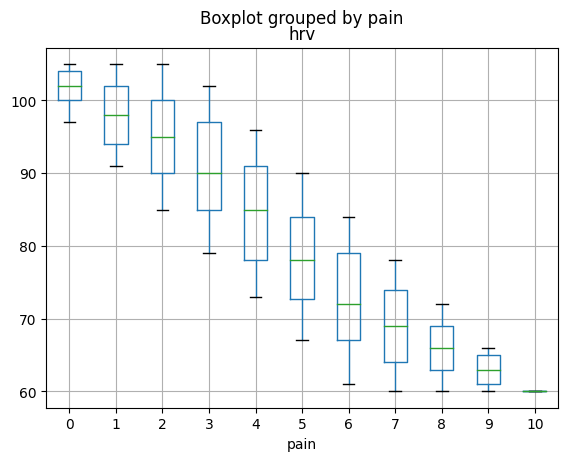

In [62]:
df.boxplot(column=['hrv'], by='pain')
plt.show()